<center>
    <img src="https://jsantarc.github.io/ADMN5016_2022/images/logo-stc.jpeg" width="300" alt="cognitiveclass.ai logo"  />
</center>

# **K Nearest Neighbor**

In this lab, you will learn and practice the K Nearest Neighbor (KNN) model. KNN for classifications. In addition, if the feature space is not very large, KNN can be a high-interpretable model as you can explain and understand how a prediction is made by looking at its nearest neighbors.

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus

After completing this lab you will be able to:

* Train  with different neighbor hyper-parameters
* Evaluate KNN models on classification
* Tune the number of neighbors and find the optimized classification 

----

First, let's install `seaborn` for visualization tasks and import required libaries for this lab

In [ ]:
!pip install seaborn==0.11.1

In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load and explore the tumor sample dataset

We first load the dataset `iris..csv` as a Pandas dataframe:

In [4]:
# Read datast in csv format
dataset_url = "https://raw.githubusercontent.com/jsantarc/ADMN5016_2022/master/week-1/iris.csv"
df = pd.read_csv(dataset_url)

Then, let's quickly take a look at the head of the dataframe.

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


and display its columns

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

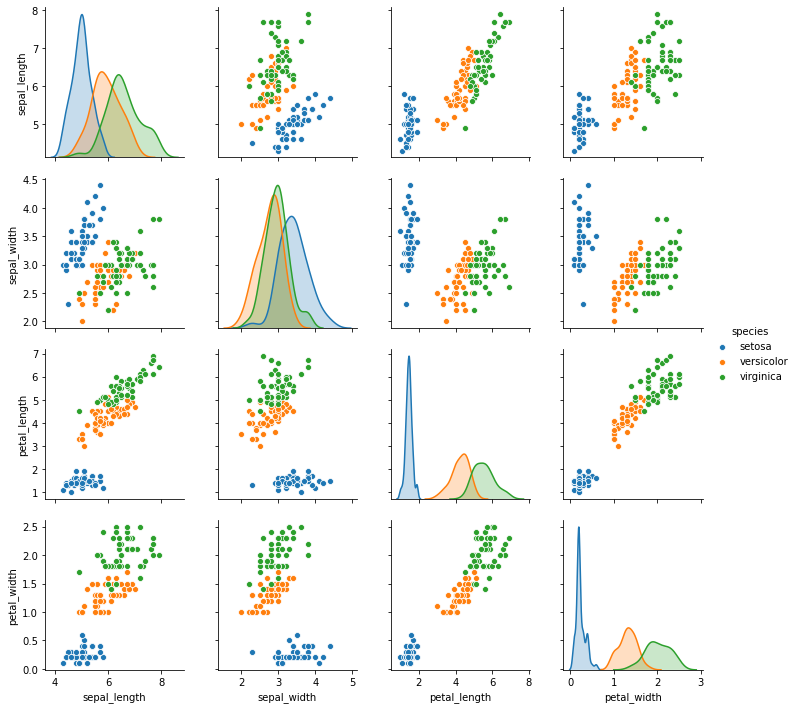

In [7]:
sns.pairplot(df, hue="species")


Each observation in this dataset contains lab tests results about a tumor sample, such as clump or shapes. Based on these lab test results or features, we want to build a classification model to predict if this tumor sample is is malicious (cancer) and benign. The target variable `y` is specified in the `Class` column.

Then, let's split the dataset into input `X` and output `y`:

In [8]:
X =df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

and we first check the statistics summary of features in `X`

In [9]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
X.shape

(150, 4)

as we can see from the above cell output, all features are numeric and ranged between 1 to 10. This is very convenient as we do not need to scale the feature values as they are already in the same range.

Next, let's check the class distribution of output `y`:

In [10]:
y.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

<AxesSubplot:>

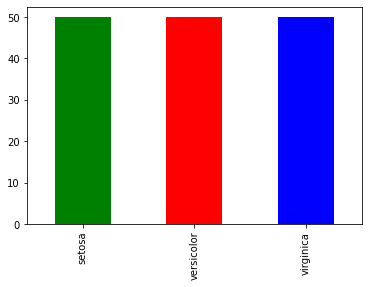

In [11]:
y.value_counts().plot.bar(color=['green', 'red','blue'])

## Process and split training and testing datasets

In [23]:
# Split 80% as training dataset
# and 20% as testing dataset (we can also use this as Validation data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

## Train and evaluate a KNN classifier with the number of neighbors set to 2

Training a KNN classifier is very similar to training other classifiers in `sklearn`, we first need to define a `KNeighborsClassifier` object. Here we use `n_neighbors=2` argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.

In [24]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

Then we can train the model with `X_train` and `y_train`, and we use ravel() method to convert the data frame `y_train` to a vector.

In [25]:
knn_model.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

and we can make predictions on the `X_test` dataframe.

In [26]:
yhat = knn_model.predict(X_test)
yhat

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

find the accuracy 

In [27]:
np.mean(yhat==y_test)

0.9666666666666667

<details><summary>Click here for a sample solution</summary>

```python
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)
```

</details>

## Find number of neighbors 

OK, you may wonder which `n_neighbors` argument may give you the best classification performance. We can try different `n_neighbors` (the K value) and check which `K` gives the best classification performance.

Here we could try K from 1 to 50, and store the aggregated `f1score` for each k into a list

In [28]:
# Try K from 1 to 50
max_k = 25
# Create an empty list  accuracy
accuracy = []

Then we will train 50 KNN classifiers with K ranged from 1 to 50.

In [29]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    # Evaluate the classifier with accuracy
  
    accuracy.append(np.mean(yhat==y_test))



/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If

Visualize your results    

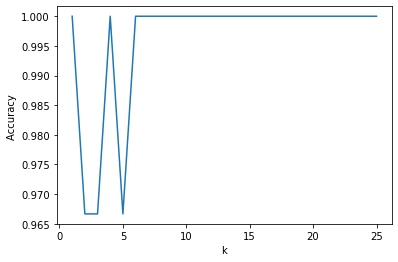

In [30]:
plt.plot([n+1 for n in range(len(accuracy))],accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy ')
plt.show()

In [ ]:
ac

Best hyperparameter and train with all your data   

In [21]:
 knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn = knn.fit(X, y)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


For more check out my course on <a href="https://www.coursera.org/learn/machine-learning-with-python">Machine Learning with Python</a> 